<h1><center>Proyecto Final</center></h1>
<h1><center>Interfaz para Prediccion de Ataques Cardiacos con Modelos de Clasificación Supervisada</center></h1>
<center>Denzel Axel Rodríguez Ramírez</center>
<center>a2243018003</center>
<center>Aprendizaje Automático</center>
<center>Dr. José Lázaro Martínez Rodríguez</center>

----------------------------------------------
1- Importando dataset y vistazo rapido
----------------------------------------------
----------------------------------------------

In [1]:
from sklearnex import patch_sklearn
patch_sklearn()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from scipy.stats.mstats import winsorize
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import cross_validate
import joblib
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import time
from scipy.stats import loguniform
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC


df_heart = pd.read_csv("heart.csv")

print(f"Numero de columnas: {df_heart.shape[1]}")
print(f"Numero de filas: {df_heart.shape[0]}")

pd.set_option('display.width', 1000)
print(df_heart.head())

Extension for Scikit-learn* enabled (https://github.com/uxlfoundation/scikit-learn-intelex)


Numero de columnas: 14
Numero de filas: 1025
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  ca  thal  target
0   52    1   0       125   212    0        1      168      0      1.0      2   2     3    0.23
1   53    1   0       140   203    1        0      155      1      3.1      0   0     3    0.37
2   70    1   0       145   174    0        1      125      1      2.6      0   0     3    0.24
3   61    1   0       148   203    0        1      161      0      0.0      2   1     3    0.28
4   62    0   0       138   294    1        1      106      0      1.9      1   3     2    0.21


----------------------------------------------
2- Verificando tipos de datos
----------------------------------------------
----------------------------------------------

In [2]:
print("Tipos de datos:")
print(df_heart.info())

Tipos de datos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   float64
dtypes: float64(2), int64(12)
memory usage: 112.2 KB
None


----------------------------------------------
3- Verificando si existen instancias/filas duplicadas
----------------------------------------------
----------------------------------------------

In [3]:
filas_duplicadas = df_heart.duplicated().sum()

if filas_duplicadas > 0:
    print(f"Se encontraron {filas_duplicadas} filas duplicadas en el conjunto train.")
    #Mostrar las filas duplicadas
    print("Muestra de filas duplicadas:")
    print(df_heart[df_heart.duplicated()].head())
else:
    print("No se encontraron filas duplicadas en el conjunto de datos.")

df_heart_d = df_heart.drop_duplicates()
df_heart_d = df_heart

Se encontraron 55 filas duplicadas en el conjunto train.
Muestra de filas duplicadas:
     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  ca  thal  target
83    38    1   2       138   175    0        1      173      0      0.0      2   4     2    0.85
130   60    0   3       150   240    0        1      171      0      0.9      2   0     2    0.75
138   47    1   2       138   257    0        0      156      0      0.0      2   0     2    0.77
157   54    1   2       120   258    0        0      147      0      0.4      1   0     3    0.86
187   56    1   0       125   249    1        0      144      1      1.2      1   1     2    0.16


----------------------------------------------
4- Mapeando la variable objetivo para modelo de clasificación
----------------------------------------------
----------------------------------------------

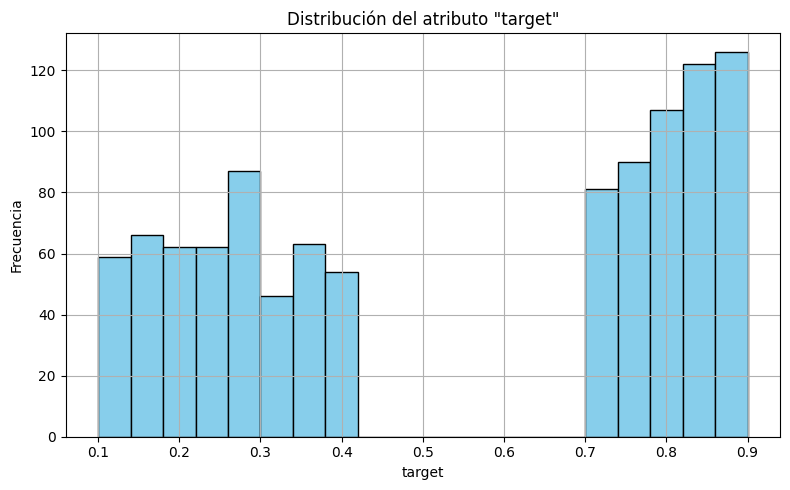

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  ca  thal  target
228   52    1   1       128   205    1        1      184      0      0.0      2   0     2     1.0
966   58    1   0       128   259    0        0      130      1      3.0      1   2     3     0.0
213   43    1   2       130   315    0        1      162      0      1.9      2   1     2     1.0
561   65    0   2       155   269    0        1      148      0      0.8      2   0     2     1.0
724   74    0   1       120   269    0        0      121      1      0.2      2   1     2     1.0


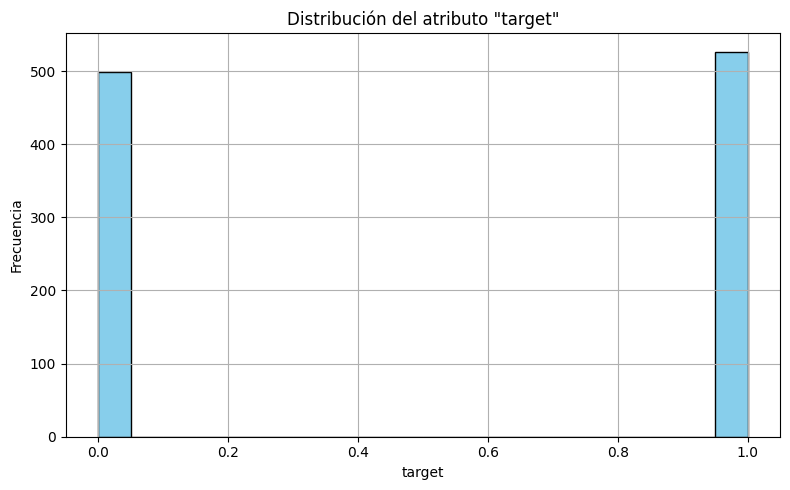

In [4]:
atributo = 'target'

plt.figure(figsize=(8, 5))
plt.hist(df_heart_d[atributo], bins=20, color='skyblue', edgecolor='black')
plt.title(f'Distribución del atributo "{atributo}"')
plt.xlabel(atributo)
plt.ylabel('Frecuencia')
plt.grid(True)
plt.tight_layout()
plt.show()

# Convertir la columna 'target' a valores 0 y 1 según la condición
df_heart_d.loc[:,'target'] = np.where(df_heart_d['target'] > 0.5, 1, 0)

print(df_heart_d.sample(5))

plt.figure(figsize=(8, 5))
plt.hist(df_heart_d[atributo], bins=20, color='skyblue', edgecolor='black')
plt.title(f'Distribución del atributo "{atributo}"')
plt.xlabel(atributo)
plt.ylabel('Frecuencia')
plt.grid(True)
plt.tight_layout()
plt.show()

----------------------------------------------
5- Distribución de atributos
----------------------------------------------
----------------------------------------------

Distribuciones originales:


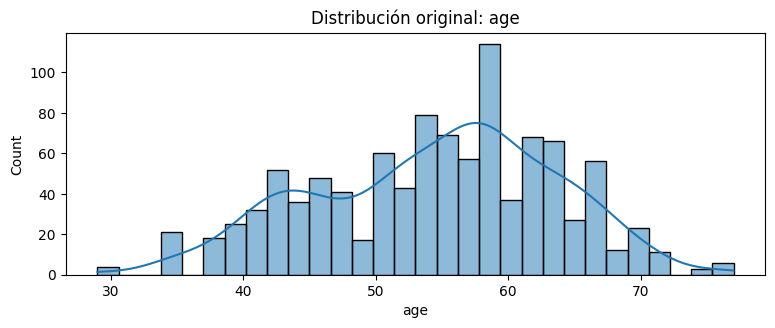

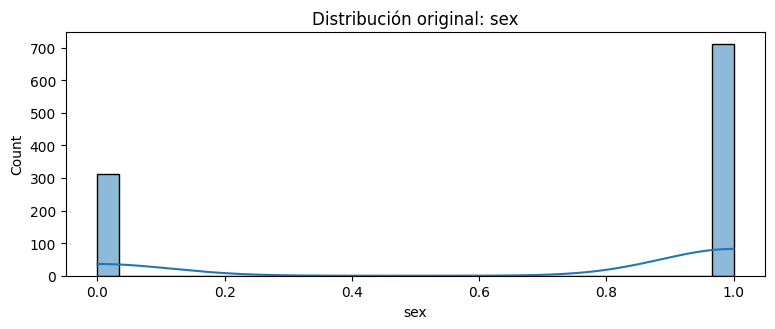

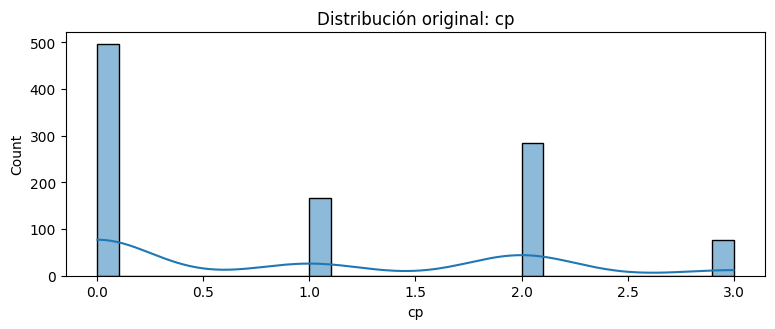

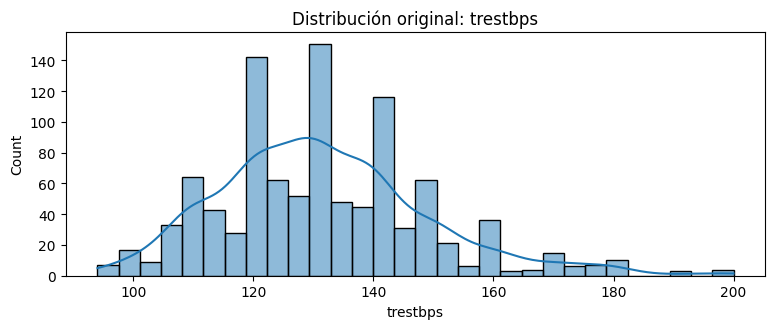

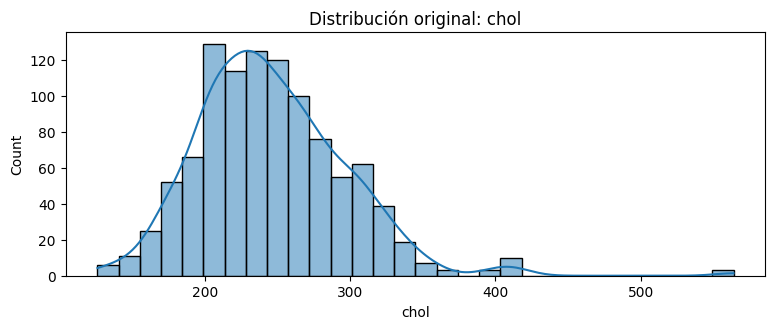

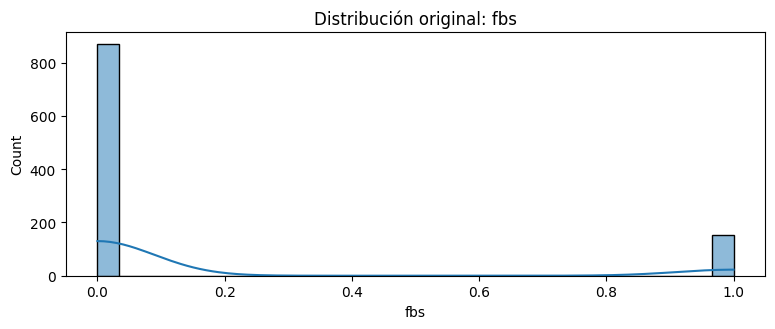

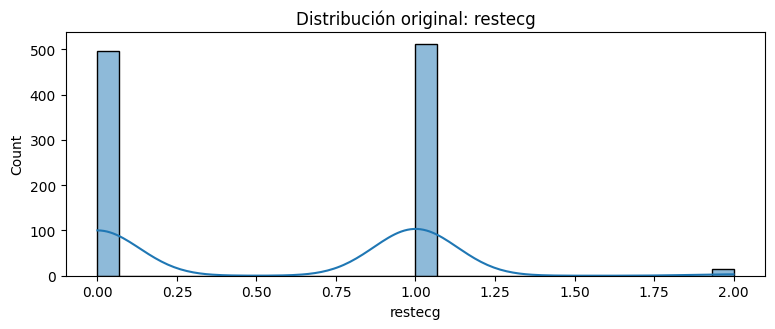

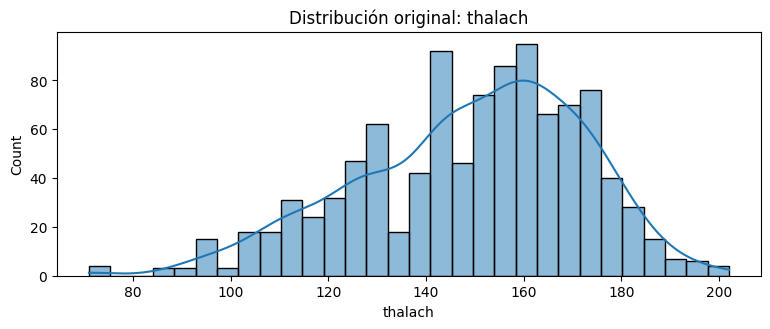

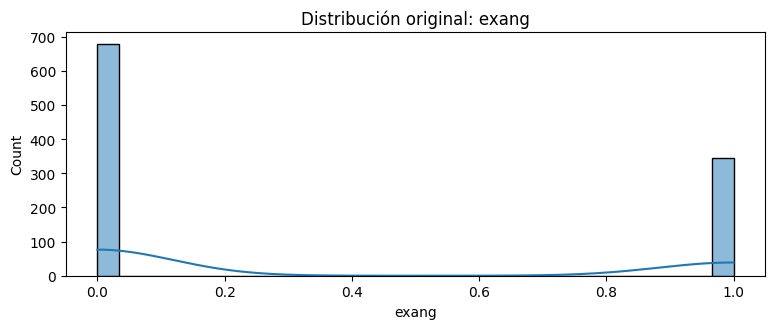

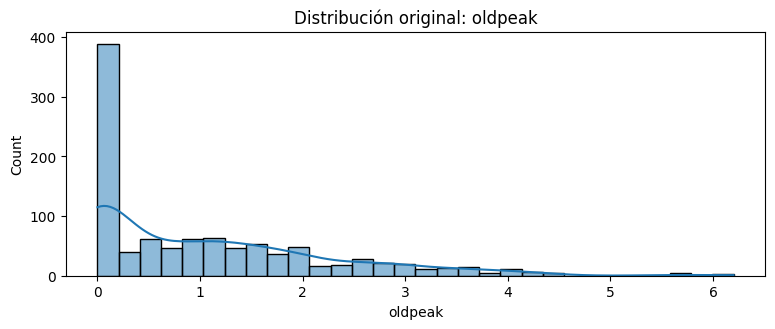

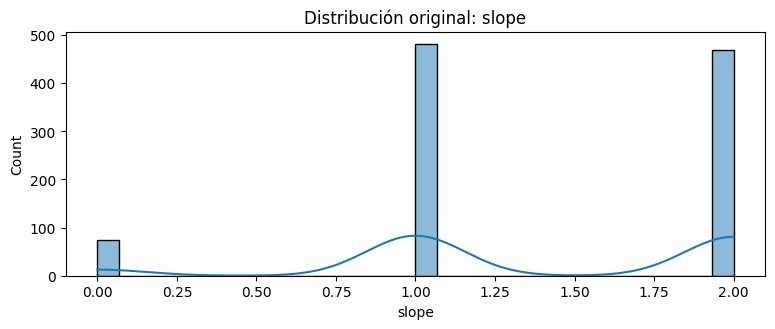

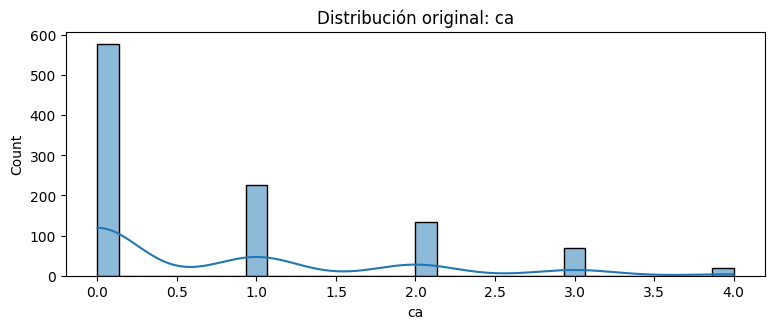

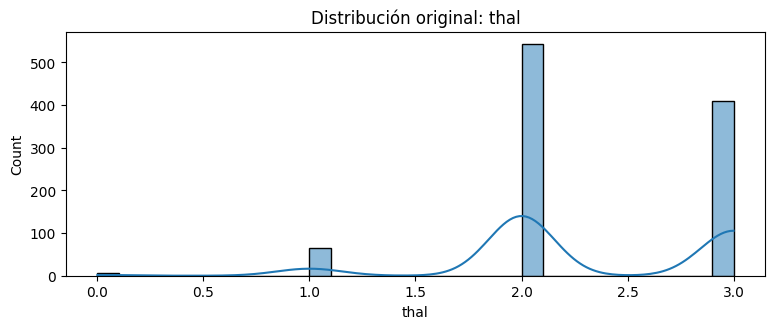

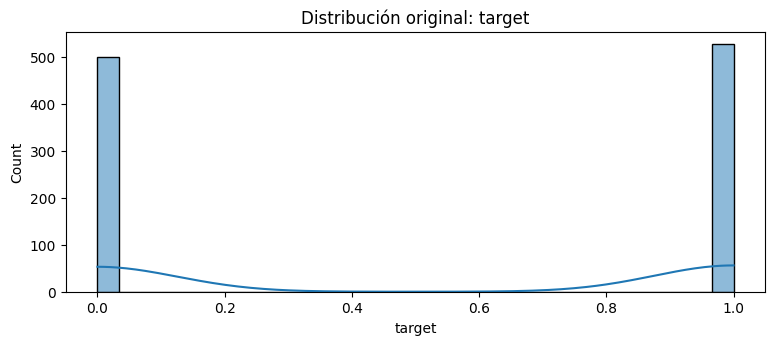

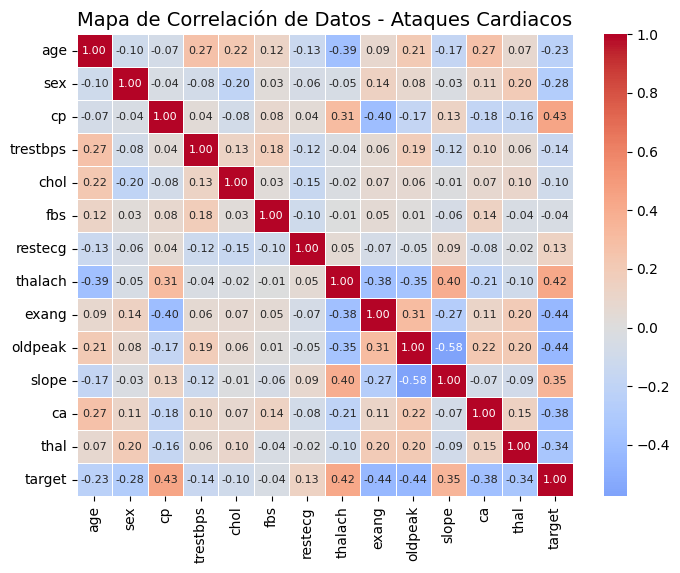

In [5]:
# Filtrar solo las columnas numéricas
numeric_cols = df_heart_d.select_dtypes(include=[np.number]).columns.tolist()

# Graficar las distribuciones originales
print("Distribuciones originales:")

for i, col in enumerate(numeric_cols):
    plt.figure(figsize=(15, len(numeric_cols) * 3))
    plt.subplot(len(numeric_cols), 2, 2 * i + 1)
    sns.histplot(df_heart_d[col], kde=True, bins=30)
    plt.title(f'Distribución original: {col}')
    plt.tight_layout()
    plt.show()

plt.figure(figsize=(8, 6)) 
sns.heatmap(df_heart_d.corr(), annot=True, fmt=".2f", cmap="coolwarm", center=0, 
            linewidths=0.5, annot_kws={"size": 8}) 
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title("Mapa de Correlación de Datos - Ataques Cardiacos", fontsize=14)
plt.show()


----------------------------------------------
6- Transformaciones de atributos
----------------------------------------------
----------------------------------------------

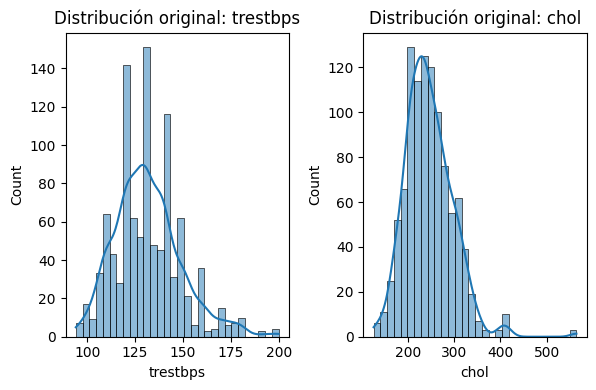

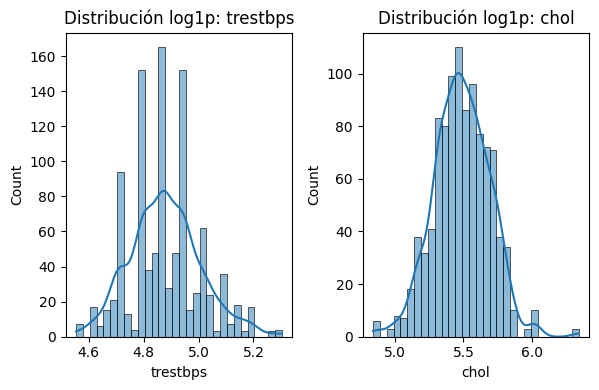

In [6]:
# Columnas a transformar
#cols_log = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
cols_log = ['trestbps', 'chol']

# Graficar distribuciones originales 
plt.figure(figsize=(15, 4))
for i, col in enumerate(cols_log):
    plt.subplot(1, 5, i + 1)
    sns.histplot(df_heart_d[col], kde=True, bins=30)
    plt.title(f'Distribución original: {col}')
plt.tight_layout()
plt.show()

# Aplicar transformación logarítmica
df_heart_d_log = df_heart_d.copy()
for col in cols_log:
    df_heart_d_log[col] = np.log1p(df_heart_d_log[col])

# Graficar distribuciones después del log1p
plt.figure(figsize=(15, 4))
for i, col in enumerate(cols_log):
    plt.subplot(1, 5, i + 1)
    sns.histplot(df_heart_d_log[col], kde=True, bins=30)
    plt.title(f'Distribución log1p: {col}')
plt.tight_layout()
plt.show()

----------------------------------------------
7- Distribuciones despues de transformaciones
----------------------------------------------
----------------------------------------------

Distribuciones finales:


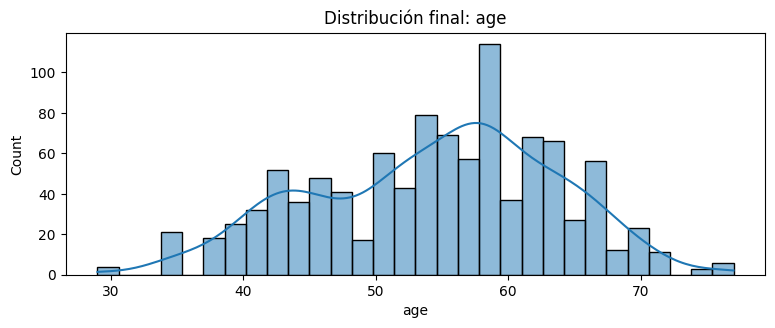

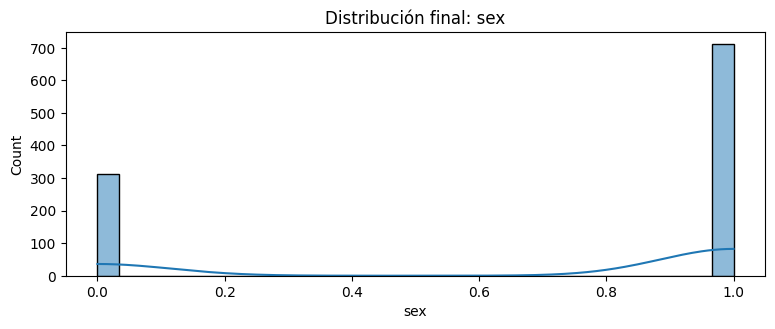

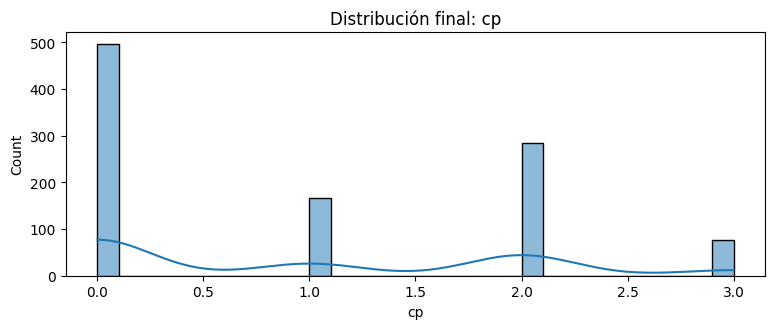

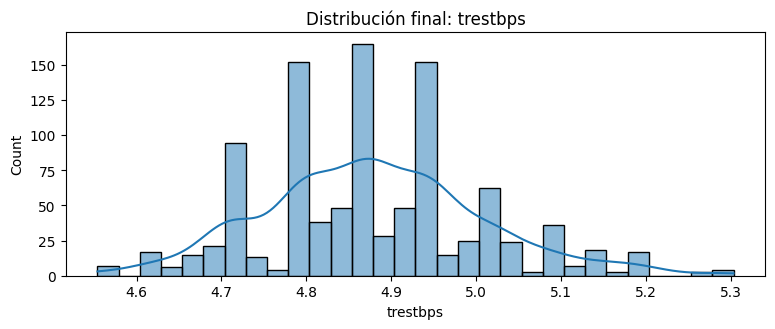

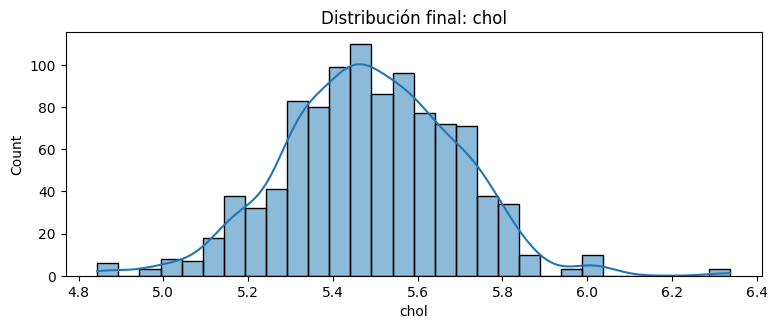

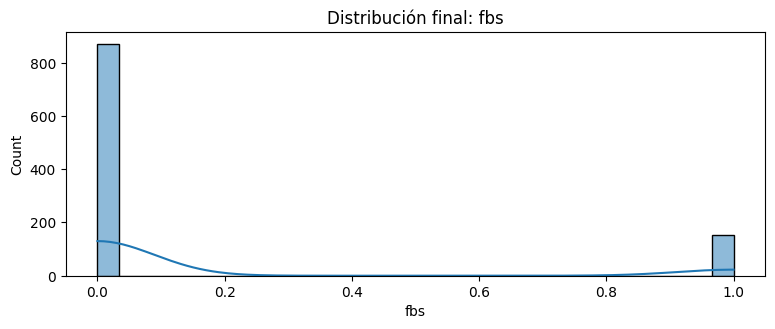

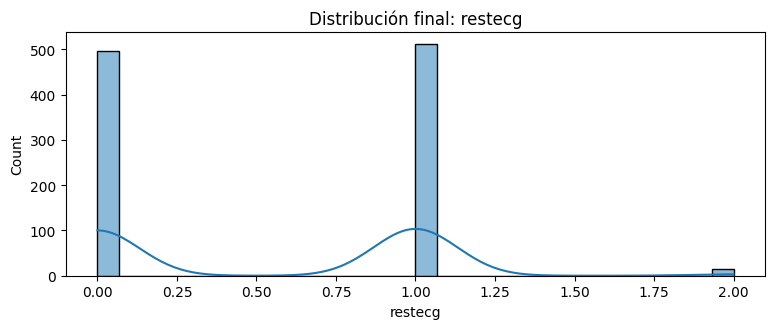

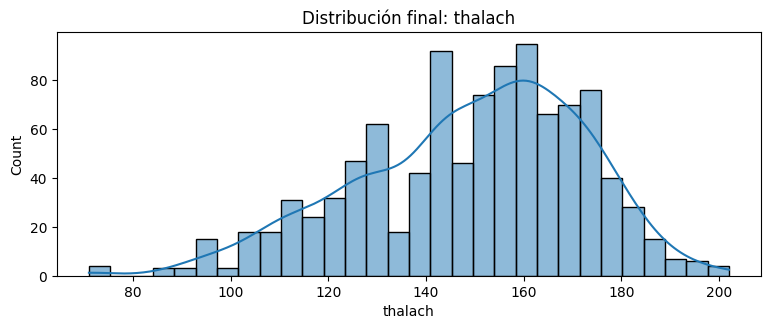

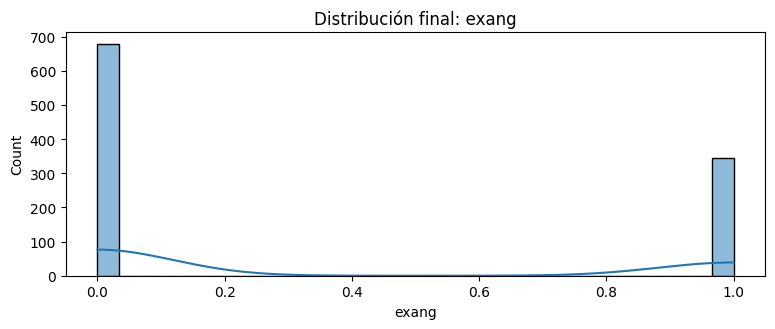

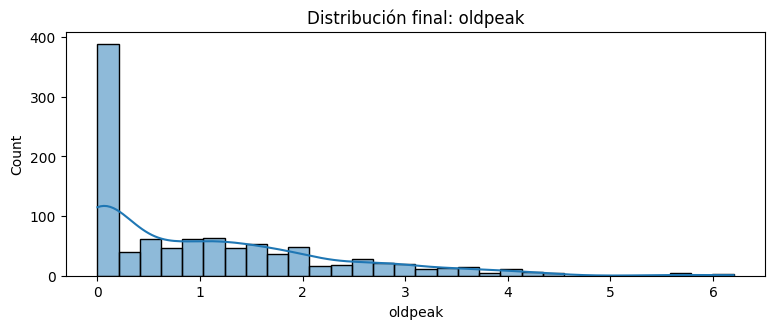

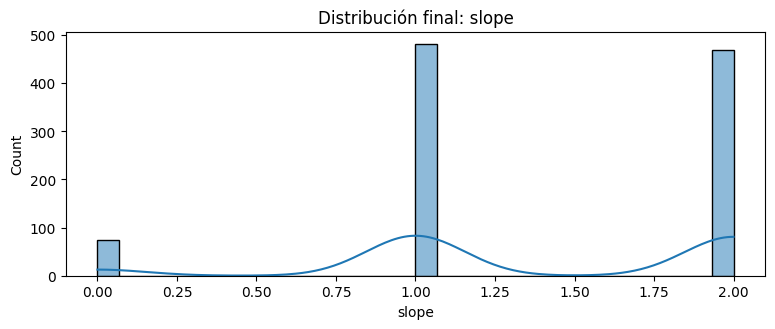

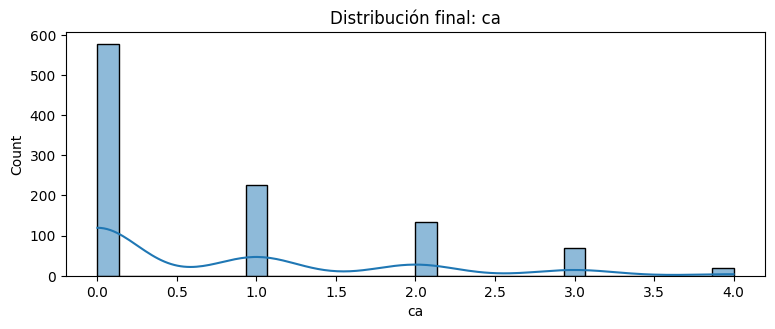

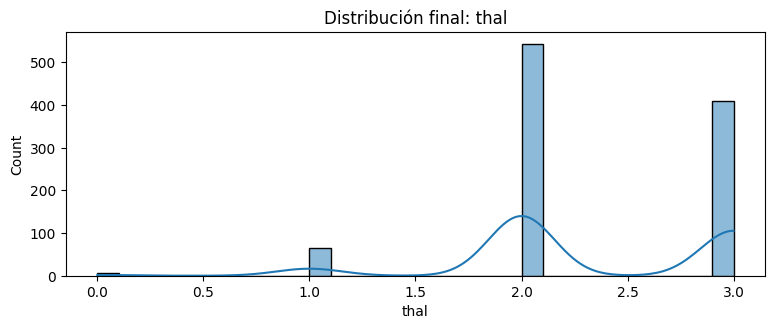

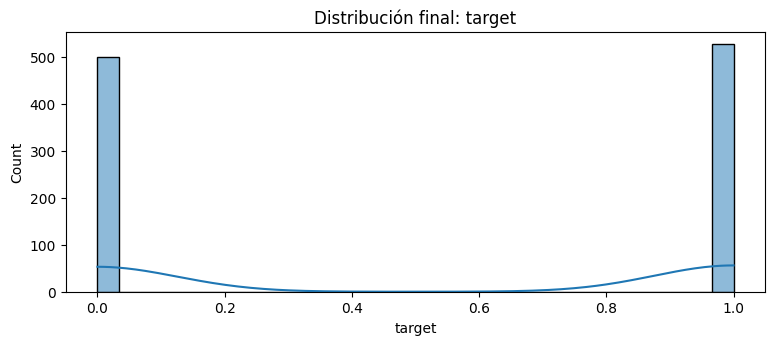

In [7]:
# Graficar las distribuciones despues de transformaciones
print("Distribuciones finales:")

for i, col in enumerate(numeric_cols):
    plt.figure(figsize=(15, len(numeric_cols) * 3))
    plt.subplot(len(numeric_cols), 2, 2 * i + 1)
    sns.histplot(df_heart_d_log[col], kde=True, bins=30)
    plt.title(f'Distribución final: {col}')
    plt.tight_layout()
    plt.show()

----------------------------------------------
8- Atributos mas relevantes
----------------------------------------------
----------------------------------------------

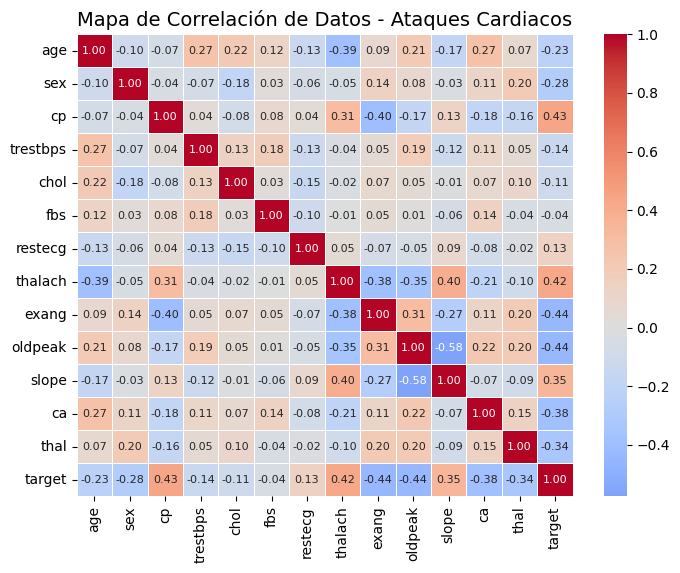

In [8]:
plt.figure(figsize=(8, 6)) 
sns.heatmap(df_heart_d_log.corr(), annot=True, fmt=".2f", cmap="coolwarm", center=0, 
            linewidths=0.5, annot_kws={"size": 8}) 
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title("Mapa de Correlación de Datos - Ataques Cardiacos", fontsize=14)
plt.show()

C:\Users\sahid\AppData\Local\Temp\ipykernel_9140\2540918271.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=anova_scores, x='F-score (ANOVA)', y='Atributo', palette='viridis')


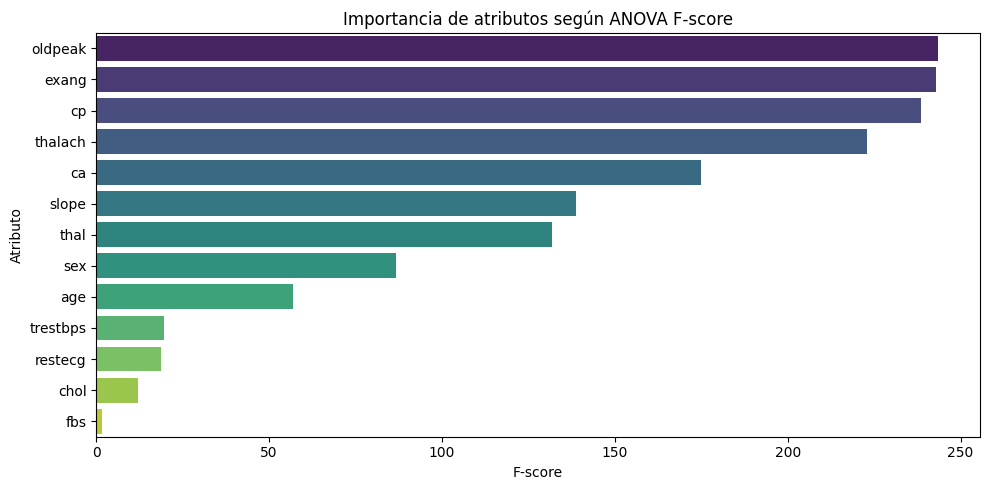

,Atributo,F-score (ANOVA),p-value
9,oldpeak,243.450780,2.141338e-49
8,exang,242.883889,2.694932e-49
2,cp,238.558457,1.563206e-48
7,thalach,222.799538,9.962971e-46
11,ca,174.877078,5.699148e-37
10,slope,138.679393,4.122053e-30
12,thal,131.802996,8.781192e-29
1,sex,86.689707,7.523831e-20
0,age,56.785135,1.067722e-13
3,trestbps,19.494999,1.115807e-05


In [9]:
X = df_heart_d_log.drop(columns=['target'])
y = df_heart_d_log['target']

# Aplicar SelectKBest con ANOVA F-score
selector = SelectKBest(score_func=f_classif, k='all')
selector.fit(X, y)

# Resultados en Dataframe
anova_scores = pd.DataFrame({
    'Atributo': X.columns,
    'F-score (ANOVA)': selector.scores_,
    'p-value': selector.pvalues_
}).sort_values(by='F-score (ANOVA)', ascending=False)

# Grafica de resultados
plt.figure(figsize=(10, 5))
sns.barplot(data=anova_scores, x='F-score (ANOVA)', y='Atributo', palette='viridis')
plt.title('Importancia de atributos según ANOVA F-score')
plt.xlabel('F-score')
plt.ylabel('Atributo')
plt.tight_layout()
plt.show()

anova_scores

----------------------------------------------
9- Seleccion de Atributos mas Relevantes
----------------------------------------------
----------------------------------------------

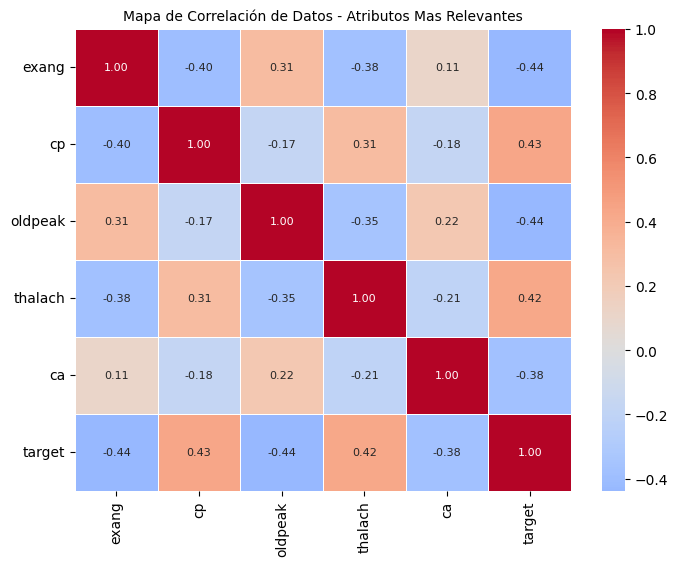

In [10]:
#atributos_relevantes = ['exang', 'cp', 'oldpeak', 'thalach', 'ca', 'thal', 'slope', 'sex', 'age', 'target']
#atributos_relevantes = ['exang', 'cp', 'oldpeak', 'thalach', 'ca', 'thal', 'slope', 'target']
#atributos_relevantes = ['exang', 'cp', 'oldpeak', 'thalach', 'ca', 'thal', 'slope', 'sex', 'age', 'restecg', 'trestbps', 'chol', 'fbs','target']
atributos_relevantes = ['exang', 'cp', 'oldpeak', 'thalach', 'ca','target']
df_heart_d_log_filtrado = df_heart_d_log[atributos_relevantes]

plt.figure(figsize=(8, 6)) 
sns.heatmap(df_heart_d_log_filtrado.corr(), annot=True, fmt=".2f", cmap="coolwarm", center=0, 
            linewidths=0.5, annot_kws={"size": 8}) 
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title("Mapa de Correlación de Datos - Atributos Mas Relevantes", fontsize=10)
plt.show()

----------------------------------------------
10- División del dataset y normalización de datos
----------------------------------------------
----------------------------------------------

In [11]:
atributo = 'target'
X = df_heart_d_log_filtrado.drop(columns=[atributo])
Y = df_heart_d_log_filtrado.target

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=16)
print(X)
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)

print("Dataset dividido y normalizado")

joblib.dump(scaler, 'modelo_standardscaler_2.pkl')
print("Modelo exportado correctamente.")

      exang  cp  oldpeak  thalach  ca
0         0   0      1.0      168   2
1         1   0      3.1      155   0
2         1   0      2.6      125   0
3         0   0      0.0      161   1
4         0   0      1.9      106   3
...     ...  ..      ...      ...  ..
1020      1   1      0.0      164   0
1021      1   0      2.8      141   1
1022      1   0      1.0      118   1
1023      0   0      0.0      159   0
1024      0   0      1.4      113   1

[1025 rows x 5 columns]
Dataset dividido y normalizado
Modelo exportado correctamente.


----------------------------------------------
11- Ajuste de Hiperarametros
----------------------------------------------
----------------------------------------------

In [12]:
# Búsqueda de Cuadrícula
# Modelo de Regresión Logística
param_grid_log = {
    'C': [0.01, 0.1, 1, 10, 100], # Controla la penalización que se le aplica al tamaño de los coeficientes, valores más altos significan menos regularización
    'solver': ['liblinear', 'lbfgs', 'saga'], # Algoritmos de optimización para la regresión logística
    'max_iter': [100, 200, 300, 500, 1000], # Número máximo de iteraciones para la convergencia
    'class_weight': [None, 'balanced'], # Manejo de clases desbalanceadas
    'penalty': ['l2'] # Tipo de regularización a aplicar, l2 es la regularización Ridge
}

grid_log = GridSearchCV(
    LogisticRegression(max_iter=1000), # Modelo base para la Regresión Logística
    param_grid=param_grid_log, # Hiperparámetros a evaluar
    scoring='accuracy', # Métricas a utilizar para evaluar el rendimiento del modelo
    cv=10, # Número de folds para la validación cruzada (10 folds)
    n_jobs=-1, # Utilizar todos los núcleos disponibles para el procesamiento
    verbose=1 # Mostrar el progreso del GridSearch
)

print("Búsqueda de Cuadrícula: Regresión Logística")
grid_log.fit(X_train_norm, Y_train)
print("Mejores parámetros:", grid_log.best_params_)
print("Mejor puntaje:", grid_log.best_score_)  # Aseguramos que se imprime el mejor score
best_log_model_grid = grid_log.best_estimator_
joblib.dump(best_log_model_grid, 'best_log_model_grid_2nd_dataset.pkl')
print("Modelo exportado.")

# Modelo de Naive Bayes
param_grid_naive = {
    'var_smoothing': list(np.logspace(-15, -5, 15)) + list(np.logspace(-11, -5, 10)) + [1e-9, 1e-8, 1e-7, 1e-6], # Suavización de la varianza
    'priors': [None, [0.3, 0.7], [0.5, 0.5]] # Ejemplo para clasificación binaria
}

grid_search_naive = GridSearchCV(
    estimator=GaussianNB(),
    param_grid=param_grid_naive,
    scoring='accuracy',
    n_jobs=-1,
    cv=10, # Aseguramos 10 folds
)

print("\nBúsqueda de Cuadrícula: Naive Bayes")
grid_search_naive.fit(X_train_norm, Y_train)
print("Mejores hiperparámetros:", grid_search_naive.best_params_)
print("Mejor puntaje:", grid_search_naive.best_score_)
best_naive_model_grid = grid_search_naive.best_estimator_
joblib.dump(best_naive_model_grid, 'best_naive_model_grid_2nd_dataset.pkl')
print("Modelo exportado.")

# Modelo de KNN
param_grid_knn = {
    'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 29, 21, 23, 25, 27, 29, 31], # Número de vecinos
    'weights': ['uniform', 'distance'], # Función de peso (uniforme o basado en la distancia)
    'metric': ['euclidean', 'manhattan', 'minkowski', 'chebyshev', 'hamming', 'braycurtis'] # Métricas de distancia
}

grid_search_knn = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid=param_grid_knn,
    scoring='accuracy',
    n_jobs=-1,
    cv=10, # 10 folds
)
print("\nBúsqueda de Cuadrícula: KNN")
grid_search_knn.fit(X_train_norm, Y_train)
print("Mejores hiperparámetros:", grid_search_knn.best_params_)
print("Mejor puntaje:", grid_search_knn.best_score_)
best_knn_model_grid = grid_search_knn.best_estimator_
joblib.dump(best_knn_model_grid, 'best_knn_model_grid_2nd_dataset.pkl')
print("Modelo exportado.")

# Modelo de SVM
param_grid_svm = {
    'C': [0.01, 0.1, 1, 10, 100], # Parámetro de regularización
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'], # Tipos de kernel
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1], # Parámetro para el kernel RBF
    'degree': [3, 4, 5], # solo aplica si kernel = 'poly'
    'class_weight': [None, 'balanced']
}

grid_search_svm = GridSearchCV(estimator=SVC(), param_grid=param_grid_svm, cv=10, n_jobs=-1, scoring='accuracy')  # 10 folds
grid_search_svm.fit(X_train_norm, Y_train)
print("\nBúsqueda de Cuadrícula: SVM")
print("Mejores hiperparámetros:", grid_search_svm.best_params_)
print("Mejor puntaje:", grid_search_svm.best_score_)
best_svm_model_grid = grid_search_svm.best_estimator_
joblib.dump(best_svm_model_grid, 'best_svm_model_grid_2nd_dataset.pkl')
print("Modelo exportado.")

# Modelo de Árboles de Decisión
param_grid_tree = {
    'max_depth': [2, 3, 4, 5, 10, 20, None],  # Profundidad máxima del árbol
    'min_samples_split': [2, 3, 4, 5, 6, 10],  # Mínimo número de muestras para dividir un nodo
    'min_samples_leaf': [1, 2, 3, 4, 5, 6],  # Mínimo número de muestras en una hoja
    'max_features': [None, 'sqrt', 'log2'],  # Características máximas a considerar en cada división
    'criterion': ['gini', 'entropy'],  # Criterio para dividir los nodos
    'class_weight': [None, 'balanced'],  # Para manejar clases desbalanceadas
    'splitter': ['best', 'random'],
}

grid_search_tree = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=param_grid_tree, cv=10, n_jobs=-1, scoring='accuracy')  # 10 folds
grid_search_tree.fit(X_train_norm, Y_train)
print("\nBúsqueda de Cuadrícula: Árboles de Decisión")
print("Mejores hiperparámetros:", grid_search_tree.best_params_)
print("Mejor puntaje:", grid_search_tree.best_score_)
best_tree_model_grid = grid_search_tree.best_estimator_
joblib.dump(best_tree_model_grid, 'best_tree_model_grid_2nd_dataset.pkl')
print("Modelo exportado.")

# Modelo Perceptron Multicapa
param_grid_mlp = {
    'hidden_layer_sizes': [(10), (50), (100), (10, 50), (50, 100), (100, 50), (50, 50), (10, 10, 10), (150, 75)],
    'activation': ['relu', 'tanh', 'logistic'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],  # Regularización L2
    'learning_rate': ['constant', 'adaptive']
}

grid_mlp = GridSearchCV(
    MLPClassifier(max_iter= 1000), # Modelo base para la Regresión Logística
    param_grid= param_grid_mlp, # Hiperparámetros a evaluar
    scoring='accuracy', # Métricas a utilizar para evaluar el rendimiento del modelo
    cv=10, # Número de folds para la validación cruzada (10 folds)
    n_jobs=-1, # Utilizar todos los núcleos disponibles para el procesamiento
    verbose=1 # Mostrar el progreso del GridSearch
)

print("\nBúsqueda de Cuadrícula: MLP")
grid_mlp.fit(X_train_norm, Y_train)
print("Mejores parámetros:", grid_mlp.best_params_)
print("Mejor puntaje:", grid_mlp.best_score_)  # Aseguramos que se imprime el mejor score
best_mlp_model_grid = grid_mlp.best_estimator_
joblib.dump(best_mlp_model_grid, 'best_mlp_model_grid_2nd_dataset.pkl')
print("Modelo exportado.")

Búsqueda de Cuadrícula: Regresión Logística
Fitting 10 folds for each of 150 candidates, totalling 1500 fits
Mejores parámetros: {'C': 0.1, 'class_weight': None, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Mejor puntaje: 0.8378048780487806
Modelo exportado.

Búsqueda de Cuadrícula: Naive Bayes
Mejores hiperparámetros: {'priors': [0.5, 0.5], 'var_smoothing': np.float64(1e-15)}
Mejor puntaje: 0.802439024390244
Modelo exportado.

Búsqueda de Cuadrícula: KNN
Mejores hiperparámetros: {'metric': 'chebyshev', 'n_neighbors': 25, 'weights': 'distance'}
Mejor puntaje: 0.9939024390243902
Modelo exportado.

Búsqueda de Cuadrícula: SVM
Mejores hiperparámetros: {'C': 100, 'class_weight': None, 'degree': 5, 'gamma': 1, 'kernel': 'poly'}
Mejor puntaje: 0.9646341463414636
Modelo exportado.

Búsqueda de Cuadrícula: Árboles de Decisión
Mejores hiperparámetros: {'class_weight': None, 'criterion': 'entropy', 'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split':

----------------------------------------------
12- Resultados con datos de prueba
----------------------------------------------
----------------------------------------------

                     Accuracy  Precision    Recall  F1-score
Regresion logistica  0.775610   0.777553  0.775610  0.775396
Naive Bayes          0.770732   0.770725  0.770732  0.770710
KNN                  0.975610   0.975652  0.975610  0.975607
SVM                  0.951220   0.951378  0.951220  0.951208
Arbol de decision    0.975610   0.975652  0.975610  0.975607
MLP                  0.951220   0.951220  0.951220  0.951220


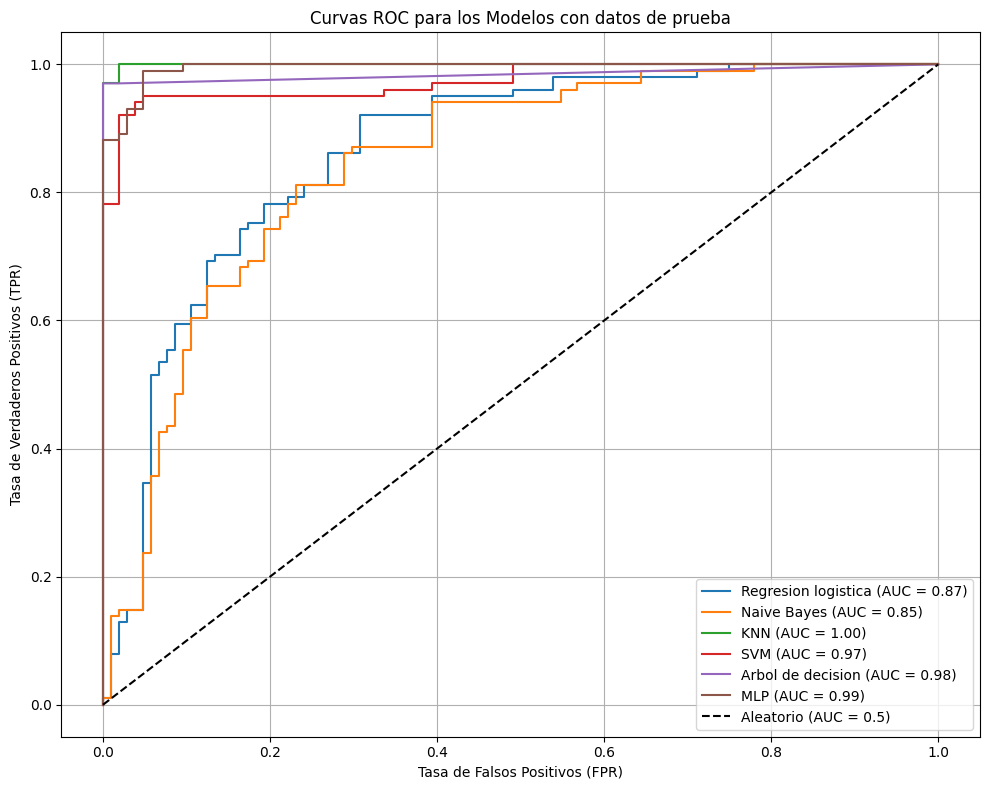

In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc

# Diccionario con los modelos a evaluar
#modelos = {
#    "Regresión Logística": best_log_model_grid,
#    "Naive Bayes": best_naive_model_grid,
#    "KNN": best_knn_model_grid,
#    "Árbol de Decisión": best_tree_model_grid,
#    "MLP": best_mlp_model_grid,
#    "SVM": best_svm_model_grid
#}

modelos = {
    "Regresion logistica": joblib.load("best_log_model_grid_2nd_dataset.pkl"),
    "Naive Bayes": joblib.load("best_naive_model_grid_2nd_dataset.pkl"),
    "KNN": joblib.load("best_knn_model_grid_2nd_dataset.pkl"),
    "SVM": joblib.load("best_svm_model_grid_2nd_dataset.pkl"),
    "Arbol de decision": joblib.load("best_tree_model_grid_2nd_dataset.pkl"),
    "MLP": joblib.load("best_mlp_model_grid_2nd_dataset.pkl")
}


# Crear un diccionario para almacenar métricas
metricas = {}


for nombre, modelo in modelos.items():
    # Obtener predicciones
    y_pred = modelo.predict(X_test_norm)

    # Guardar métricas
    metricas[nombre] = {
        "Accuracy": accuracy_score(Y_test, y_pred),
        "Precision": precision_score(Y_test, y_pred, average='weighted'),
        "Recall": recall_score(Y_test, y_pred, average='weighted'),
        "F1-score": f1_score(Y_test, y_pred, average='weighted')
    }

# Mostrar métricas en formato tabla
df_metricas = pd.DataFrame(metricas).T
print(df_metricas)

#curvas roc

plt.figure(figsize=(10, 8))

for name, modelo in modelos.items():
    if hasattr(modelo, "predict_proba"):
        y_scores = modelo.predict_proba(X_test_norm)[:, 1]
    else:
        y_scores = modelo.decision_function(X_test_norm)

    fpr, tpr, _ = roc_curve(Y_test, y_scores)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

# Curva aleatoria
plt.plot([0, 1], [0, 1], 'k--', label='Aleatorio (AUC = 0.5)')

plt.title('Curvas ROC para los Modelos con datos de prueba')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

In [15]:
# Evaluación de modelos
for nombre, modelo in modelos.items():
    print(f"\n--- {nombre} ---")
    
    # Obtener predicciones
    y_pred = modelo.predict(X_test_norm)
    
    # Reporte detallado por clase
    print("\nClassification Report:")
    print(classification_report(Y_test, y_pred))


--- Regresion logistica ---

Classification Report:
              precision    recall  f1-score   support

         0.0       0.80      0.74      0.77       104
         1.0       0.75      0.81      0.78       101

    accuracy                           0.78       205
   macro avg       0.78      0.78      0.78       205
weighted avg       0.78      0.78      0.78       205


--- Naive Bayes ---

Classification Report:
              precision    recall  f1-score   support

         0.0       0.77      0.78      0.78       104
         1.0       0.77      0.76      0.77       101

    accuracy                           0.77       205
   macro avg       0.77      0.77      0.77       205
weighted avg       0.77      0.77      0.77       205


--- KNN ---

Classification Report:
              precision    recall  f1-score   support

         0.0       0.97      0.98      0.98       104
         1.0       0.98      0.97      0.98       101

    accuracy                           0.98    

----------------------------------------------
13- Resultados con datos de entrenamiento
----------------------------------------------
----------------------------------------------

                     Accuracy  Precision    Recall  F1-score
Regresion logistica  0.836585   0.839563  0.836585  0.835845
Naive Bayes          0.806098   0.806541  0.806098  0.805788
KNN                  0.997561   0.997572  0.997561  0.997561
SVM                  0.979268   0.979330  0.979268  0.979263
Arbol de decision    0.997561   0.997572  0.997561  0.997561
MLP                  0.974390   0.974840  0.974390  0.974369


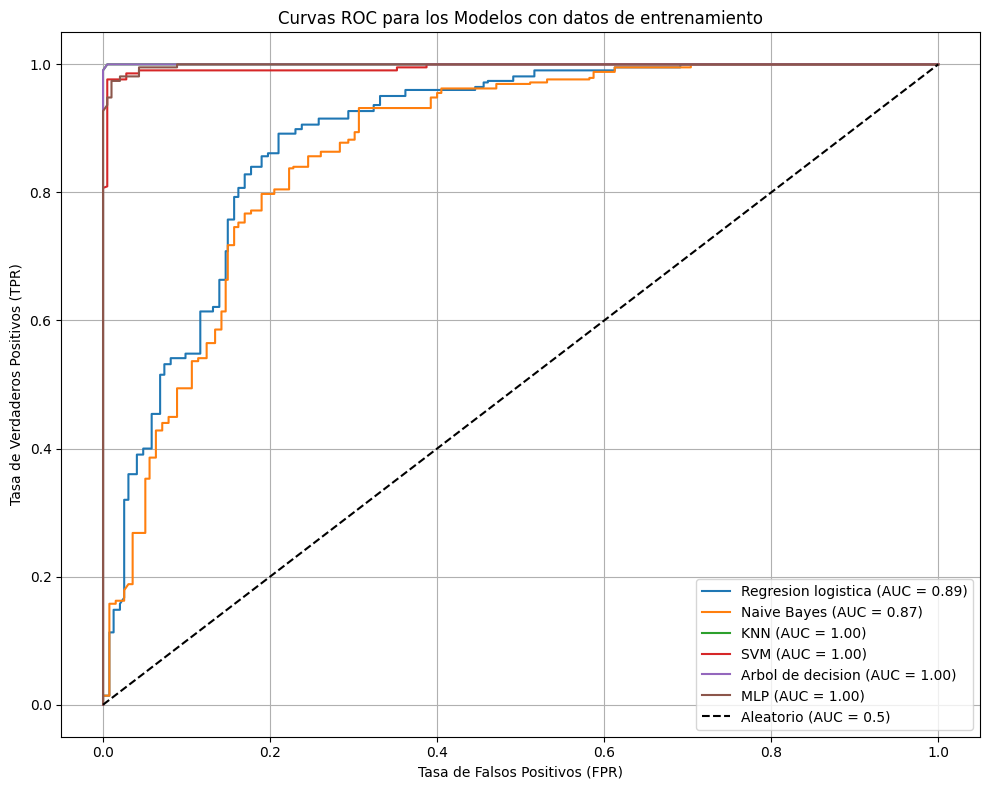

In [16]:
# Crear un diccionario para almacenar métricas
metricas_entrenamiento = {}

for nombre, modelo in modelos.items():
    # Obtener predicciones
    y_pred = modelo.predict(X_train_norm)

    # Guardar métricas
    metricas_entrenamiento[nombre] = {
        "Accuracy": accuracy_score(Y_train, y_pred),
        "Precision": precision_score(Y_train, y_pred, average='weighted'),
        "Recall": recall_score(Y_train, y_pred, average='weighted'),
        "F1-score": f1_score(Y_train, y_pred, average='weighted')
    }

# Mostrar métricas en formato tabla
df_metricas_entrenamiento = pd.DataFrame(metricas_entrenamiento).T
print(df_metricas_entrenamiento)

#curvas roc

plt.figure(figsize=(10, 8))

for name, modelo in modelos.items():
    if hasattr(modelo, "predict_proba"):
        y_scores = modelo.predict_proba(X_train_norm)[:, 1]
    else:
        y_scores = modelo.decision_function(X_train_norm)

    fpr, tpr, _ = roc_curve(Y_train, y_scores)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

# Curva aleatoria
plt.plot([0, 1], [0, 1], 'k--', label='Aleatorio (AUC = 0.5)')

plt.title('Curvas ROC para los Modelos con datos de entrenamiento')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

----------------------------------------------
14- Ensamble XGBoost (datos de prueba)
----------------------------------------------
----------------------------------------------

Accuracy: 0.9854
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.99       104
         1.0       1.00      0.97      0.98       101

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



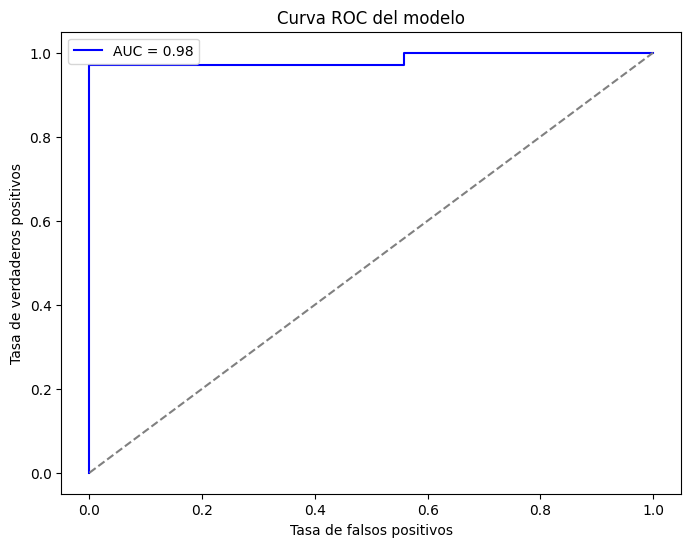

['ensamble_XGB_dataset2.pkl']

In [17]:
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
 
modelos_base = [
    #('Regresion logistica', LogisticRegression(C = 0.1, class_weight = None, max_iter = 100, penalty = 'l2', solver = 'liblinear')),
    #('KNN', KNeighborsClassifier( metric = 'chebyshev', n_neighbors = 25, weights = 'distance')),
    ('KNN', KNeighborsClassifier( metric = 'chebyshev', n_neighbors = 25, weights = 'distance')),
    ('SVM', SVC(C = 100, class_weight = None, degree = 5, gamma = 1, kernel = 'poly', probability=True)),
    ('Arboles de decision', DecisionTreeClassifier(class_weight = 'balanced', criterion = 'entropy', max_depth = 20, max_features = 'log2', min_samples_leaf = 1, min_samples_split = 2, splitter = 'best')),
    ('Perceptron multicapa', MLPClassifier(max_iter = 1000, activation = 'tanh', alpha = 0.001, hidden_layer_sizes = (150, 75), learning_rate = 'adaptive', solver = 'adam'))
]

# Metamodelo (combinador)
metamodelo = XGBClassifier()

# Crear el StackingClassifier
stacking_clf = StackingClassifier(cv=10, n_jobs=-1, estimators=modelos_base, final_estimator=metamodelo, passthrough=True)

# Entrenar el modelo con los datos seleccionados
stacking_clf.fit(X_train_norm, Y_train)

# Evaluación del modelo en el conjunto de prueba
y_pred = stacking_clf.predict(X_test_norm)

# Métricas de rendimiento
from sklearn.metrics import accuracy_score, classification_report
print(f"Accuracy: {accuracy_score(Y_test, y_pred):.4f}")
print(classification_report(Y_test, y_pred))

# Obtener probabilidades de predicción del modelo
y_proba = stacking_clf.predict_proba(X_test_norm)[:, 1]  # Solo la probabilidad de la clase positiva

# Calcular la curva ROC
fpr, tpr, _ = roc_curve(Y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}", color="blue")
plt.plot([0,1], [0,1], linestyle="--", color="gray")  # Línea de referencia
plt.xlabel("Tasa de falsos positivos")
plt.ylabel("Tasa de verdaderos positivos")
plt.title("Curva ROC del modelo")
plt.legend()
plt.show()

joblib.dump(stacking_clf, 'ensamble_XGB_dataset2.pkl')

----------------------------------------------
15- Ensamble XGBoost (datos de entrenamiento)
----------------------------------------------
----------------------------------------------

Accuracy: 0.9951
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99       395
         1.0       1.00      0.99      1.00       425

    accuracy                           1.00       820
   macro avg       0.99      1.00      1.00       820
weighted avg       1.00      1.00      1.00       820



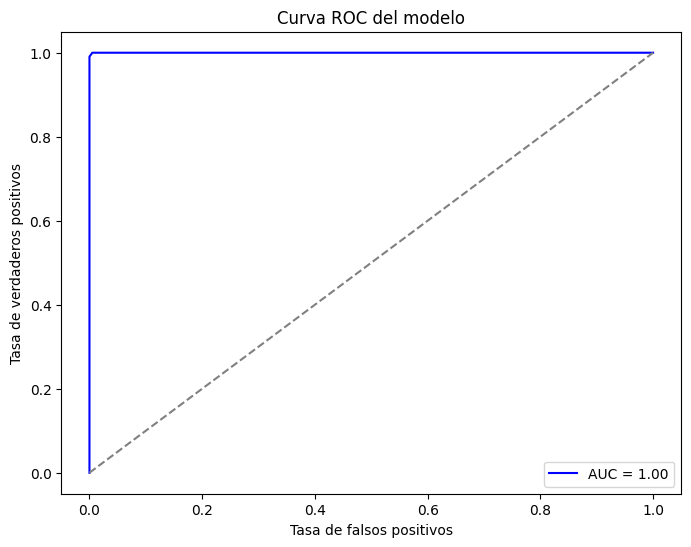

In [18]:
# Evaluación del modelo en el conjunto de entrenamiento
y_pred_train = stacking_clf.predict(X_train_norm)

# Métricas de rendimiento
from sklearn.metrics import accuracy_score, classification_report
print(f"Accuracy: {accuracy_score(Y_train, y_pred_train):.4f}")
print(classification_report(Y_train, y_pred_train))



# Obtener probabilidades de predicción del modelo
y_proba = stacking_clf.predict_proba(X_train_norm)[:, 1]  # Solo la probabilidad de la clase positiva

# Calcular la curva ROC
fpr, tpr, _ = roc_curve(Y_train, y_proba)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}", color="blue")
plt.plot([0,1], [0,1], linestyle="--", color="gray")  # Línea de referencia
plt.xlabel("Tasa de falsos positivos")
plt.ylabel("Tasa de verdaderos positivos")
plt.title("Curva ROC del modelo")
plt.legend()
plt.show()

----------------------------------------------
16- Ensamble Arbol de Decision (datos de prueba)
----------------------------------------------
----------------------------------------------

Accuracy: 0.9854
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.99       104
         1.0       1.00      0.97      0.98       101

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



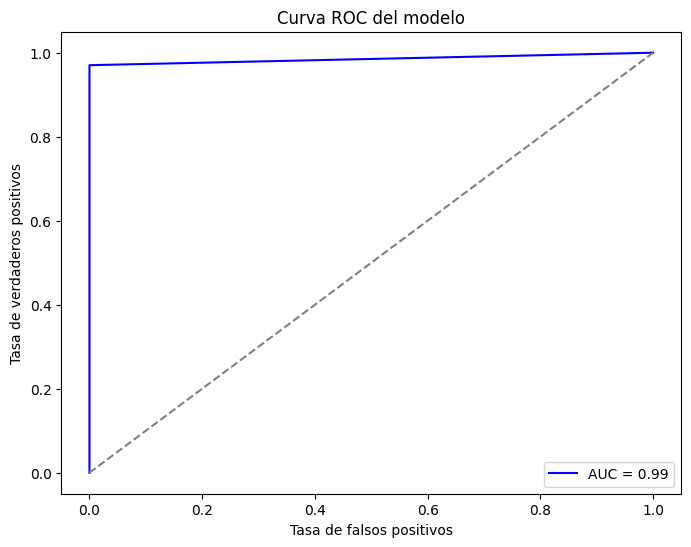

['ensamble_DT_dataset2.pkl']

In [19]:
# Metamodelo (combinador)
metamodelo = DecisionTreeClassifier()

# Crear el StackingClassifier
stacking_clf = StackingClassifier(cv=10, n_jobs=-1, estimators=modelos_base, final_estimator=metamodelo)

# Entrenar el modelo con los datos seleccionados
stacking_clf.fit(X_train_norm, Y_train)

# Evaluación del modelo en el conjunto de prueba
y_pred = stacking_clf.predict(X_test_norm)

# Métricas de rendimiento
from sklearn.metrics import accuracy_score, classification_report
print(f"Accuracy: {accuracy_score(Y_test, y_pred):.4f}")
print(classification_report(Y_test, y_pred))



# Obtener probabilidades de predicción del modelo
y_proba = stacking_clf.predict_proba(X_test_norm)[:, 1]  # Solo la probabilidad de la clase positiva

# Calcular la curva ROC
fpr, tpr, _ = roc_curve(Y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}", color="blue")
plt.plot([0,1], [0,1], linestyle="--", color="gray")  # Línea de referencia
plt.xlabel("Tasa de falsos positivos")
plt.ylabel("Tasa de verdaderos positivos")
plt.title("Curva ROC del modelo")
plt.legend()
plt.show()

joblib.dump(stacking_clf, 'ensamble_DT_dataset2.pkl')

----------------------------------------------
17- Ensamble Arbol de Decision (datos de entrenamiento)
----------------------------------------------
----------------------------------------------

Accuracy: 0.9951
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99       395
         1.0       1.00      0.99      1.00       425

    accuracy                           1.00       820
   macro avg       0.99      1.00      1.00       820
weighted avg       1.00      1.00      1.00       820



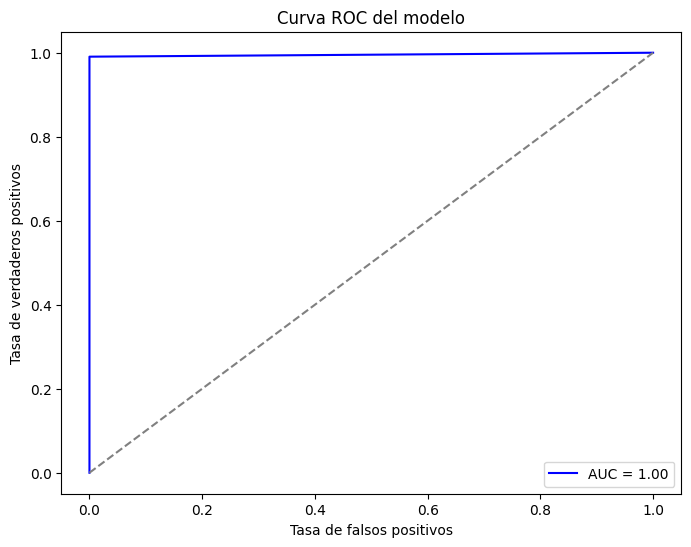

In [20]:
# Evaluación del modelo en el conjunto de entrenamiento
y_pred_train = stacking_clf.predict(X_train_norm)

# Métricas de rendimiento
from sklearn.metrics import accuracy_score, classification_report
print(f"Accuracy: {accuracy_score(Y_train, y_pred_train):.4f}")
print(classification_report(Y_train, y_pred_train))



# Obtener probabilidades de predicción del modelo
y_proba = stacking_clf.predict_proba(X_train_norm)[:, 1]  # Solo la probabilidad de la clase positiva

# Calcular la curva ROC
fpr, tpr, _ = roc_curve(Y_train, y_proba)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}", color="blue")
plt.plot([0,1], [0,1], linestyle="--", color="gray")  # Línea de referencia
plt.xlabel("Tasa de falsos positivos")
plt.ylabel("Tasa de verdaderos positivos")
plt.title("Curva ROC del modelo")
plt.legend()
plt.show()

----------------------------------------------
18- Ensamble Regresion Logistica (datos de prueba)
----------------------------------------------
----------------------------------------------

Accuracy: 0.9756
              precision    recall  f1-score   support

         0.0       0.97      0.98      0.98       104
         1.0       0.98      0.97      0.98       101

    accuracy                           0.98       205
   macro avg       0.98      0.98      0.98       205
weighted avg       0.98      0.98      0.98       205



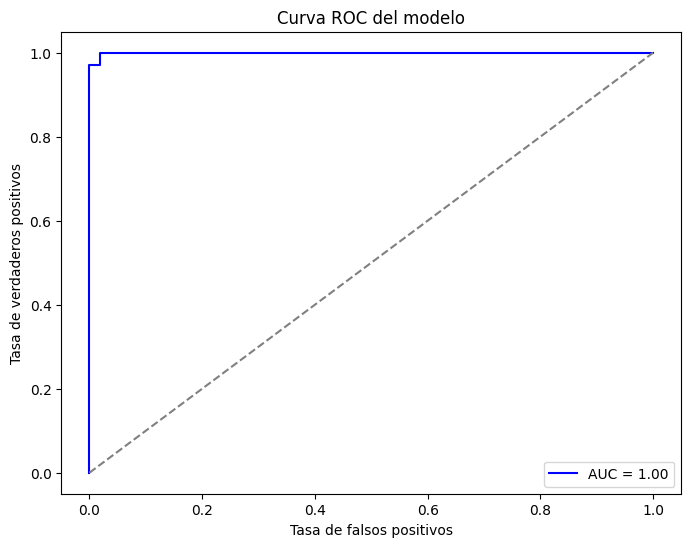

['ensamble_LR_dataset2.pkl']

In [21]:
# Metamodelo (combinador)
metamodelo = LogisticRegression()

# Crear el StackingClassifier
stacking_clf = StackingClassifier(cv=10, n_jobs=-1, estimators=modelos_base, final_estimator=metamodelo)

# Entrenar el modelo con los datos seleccionados
stacking_clf.fit(X_train_norm, Y_train)

# Evaluación del modelo en el conjunto de prueba
y_pred = stacking_clf.predict(X_test_norm)

# Métricas de rendimiento
from sklearn.metrics import accuracy_score, classification_report
print(f"Accuracy: {accuracy_score(Y_test, y_pred):.4f}")
print(classification_report(Y_test, y_pred))

# Obtener probabilidades de predicción del modelo
y_proba = stacking_clf.predict_proba(X_test_norm)[:, 1]  # Solo la probabilidad de la clase positiva

# Calcular la curva ROC
fpr, tpr, _ = roc_curve(Y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}", color="blue")
plt.plot([0,1], [0,1], linestyle="--", color="gray")  # Línea de referencia
plt.xlabel("Tasa de falsos positivos")
plt.ylabel("Tasa de verdaderos positivos")
plt.title("Curva ROC del modelo")
plt.legend()
plt.show()

joblib.dump(stacking_clf, 'ensamble_LR_dataset2.pkl')

----------------------------------------------
19- Ensamble Regresion Logistica (datos de entrenamiento)
----------------------------------------------
----------------------------------------------

Accuracy: 0.9976
              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00       395
         1.0       1.00      1.00      1.00       425

    accuracy                           1.00       820
   macro avg       1.00      1.00      1.00       820
weighted avg       1.00      1.00      1.00       820



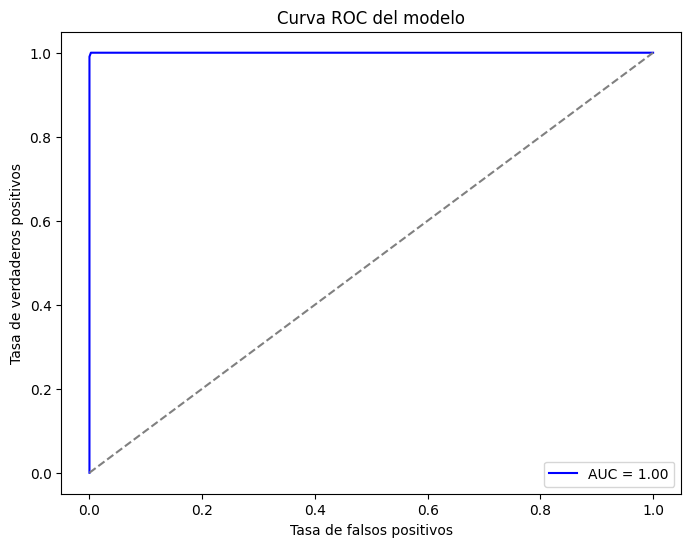

In [22]:
# Evaluación del modelo en el conjunto de entrenamiento
y_pred_train = stacking_clf.predict(X_train_norm)

# Métricas de rendimiento
from sklearn.metrics import accuracy_score, classification_report
print(f"Accuracy: {accuracy_score(Y_train, y_pred_train):.4f}")
print(classification_report(Y_train, y_pred_train))



# Obtener probabilidades de predicción del modelo
y_proba = stacking_clf.predict_proba(X_train_norm)[:, 1]  # Solo la probabilidad de la clase positiva

# Calcular la curva ROC
fpr, tpr, _ = roc_curve(Y_train, y_proba)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}", color="blue")
plt.plot([0,1], [0,1], linestyle="--", color="gray")  # Línea de referencia
plt.xlabel("Tasa de falsos positivos")
plt.ylabel("Tasa de verdaderos positivos")
plt.title("Curva ROC del modelo")
plt.legend()
plt.show()

----------------------------------------------
20- Ensamble Bosque Aleatorio (datos de prueba)
----------------------------------------------
----------------------------------------------

Accuracy: 0.9756
              precision    recall  f1-score   support

         0.0       0.97      0.98      0.98       104
         1.0       0.98      0.97      0.98       101

    accuracy                           0.98       205
   macro avg       0.98      0.98      0.98       205
weighted avg       0.98      0.98      0.98       205



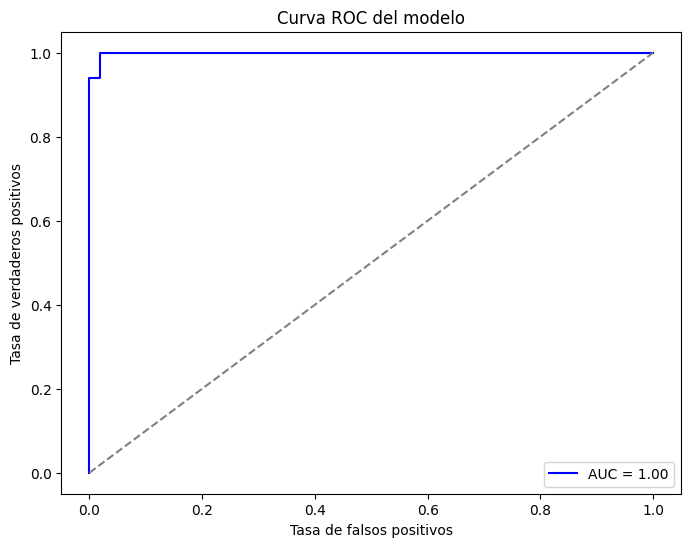

['ensamble_RF_dataset2.pkl']

In [23]:
from sklearn.ensemble import RandomForestClassifier

# Metamodelo (combinador)
metamodelo = RandomForestClassifier()

# Crear el StackingClassifier
stacking_clf = StackingClassifier(cv=10, n_jobs=-1, estimators=modelos_base, final_estimator=metamodelo)

# Entrenar el modelo con los datos seleccionados
stacking_clf.fit(X_train_norm, Y_train)

# Evaluación del modelo en el conjunto de prueba
y_pred = stacking_clf.predict(X_test_norm)

# Métricas de rendimiento
from sklearn.metrics import accuracy_score, classification_report
print(f"Accuracy: {accuracy_score(Y_test, y_pred):.4f}")
print(classification_report(Y_test, y_pred))


# Obtener probabilidades de predicción del modelo
y_proba = stacking_clf.predict_proba(X_test_norm)[:, 1]  # Solo la probabilidad de la clase positiva

# Calcular la curva ROC
fpr, tpr, _ = roc_curve(Y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}", color="blue")
plt.plot([0,1], [0,1], linestyle="--", color="gray")  # Línea de referencia
plt.xlabel("Tasa de falsos positivos")
plt.ylabel("Tasa de verdaderos positivos")
plt.title("Curva ROC del modelo")
plt.legend()
plt.show()

joblib.dump(stacking_clf, 'ensamble_RF_dataset2.pkl')

----------------------------------------------
21- Ensamble Bosque Aleatorio (datos de entrenamiento)
----------------------------------------------
----------------------------------------------

Accuracy: 0.9976
              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00       395
         1.0       1.00      1.00      1.00       425

    accuracy                           1.00       820
   macro avg       1.00      1.00      1.00       820
weighted avg       1.00      1.00      1.00       820



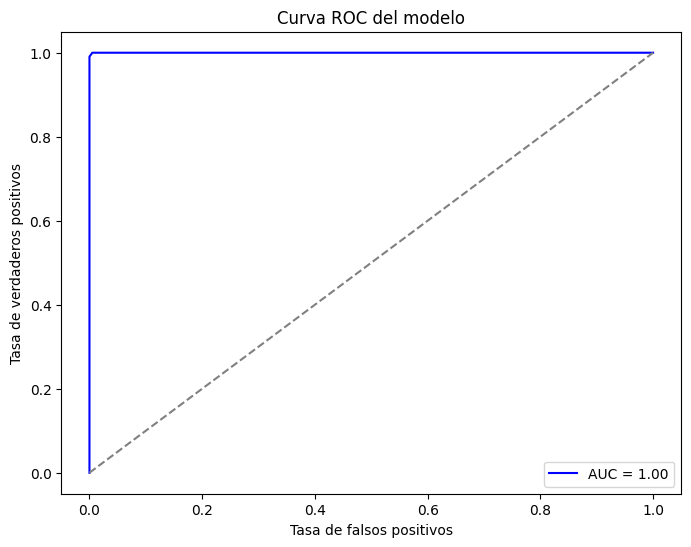

In [24]:
# Evaluación del modelo en el conjunto de entrenamiento
y_pred_train = stacking_clf.predict(X_train_norm)

# Métricas de rendimiento
from sklearn.metrics import accuracy_score, classification_report
print(f"Accuracy: {accuracy_score(Y_train, y_pred_train):.4f}")
print(classification_report(Y_train, y_pred_train))


# Obtener probabilidades de predicción del modelo
y_proba = stacking_clf.predict_proba(X_train_norm)[:, 1]  # Solo la probabilidad de la clase positiva

# Calcular la curva ROC
fpr, tpr, _ = roc_curve(Y_train, y_proba)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}", color="blue")
plt.plot([0,1], [0,1], linestyle="--", color="gray")  # Línea de referencia
plt.xlabel("Tasa de falsos positivos")
plt.ylabel("Tasa de verdaderos positivos")
plt.title("Curva ROC del modelo")
plt.legend()
plt.show()

----------------------------------------------
22- Ensamble votacion (datos de prueba)
----------------------------------------------
----------------------------------------------

c:\Users\sahid\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(


              precision    recall  f1-score   support

         0.0       0.97      0.98      0.98       104
         1.0       0.98      0.97      0.98       101

    accuracy                           0.98       205
   macro avg       0.98      0.98      0.98       205
weighted avg       0.98      0.98      0.98       205



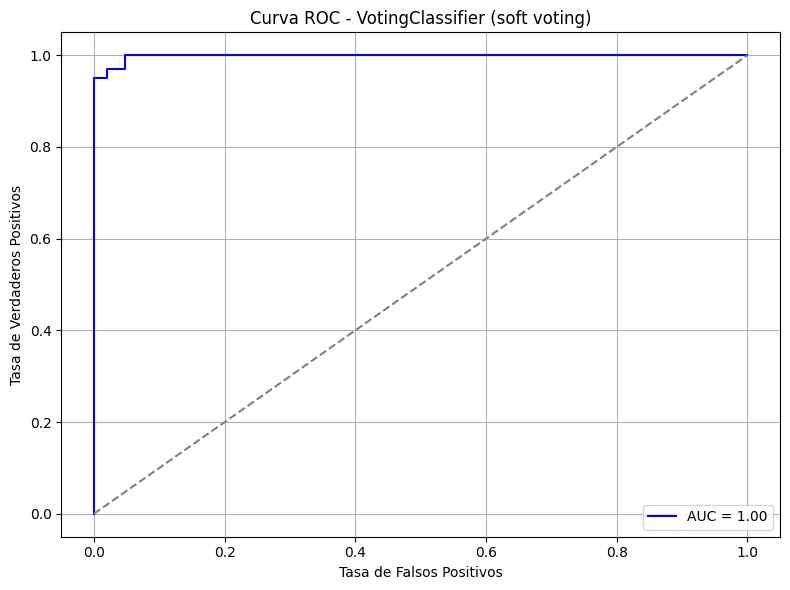

['ensamble_VOT_dataset2.pkl']

In [25]:
from sklearn.ensemble import VotingClassifier

voting_clf_soft = VotingClassifier(estimators=modelos_base, voting='soft')
voting_clf_soft.fit(X_train_norm, Y_train)

y_pred_test = voting_clf_soft.predict(X_test_norm)
print(classification_report(Y_test, y_pred_test))

y_proba = voting_clf_soft.predict_proba(X_test_norm)[:, 1]

# Calcular curva ROC
fpr, tpr, _ = roc_curve(Y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}", color="blue")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("Tasa de Falsos Positivos")
plt.ylabel("Tasa de Verdaderos Positivos")
plt.title("Curva ROC - VotingClassifier (soft voting)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

joblib.dump(stacking_clf, 'ensamble_VOT_dataset2.pkl')

----------------------------------------------
23- Ensamble votacion (datos de entrenamiento)
----------------------------------------------
----------------------------------------------

Accuracy: 0.9976
              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00       395
         1.0       1.00      1.00      1.00       425

    accuracy                           1.00       820
   macro avg       1.00      1.00      1.00       820
weighted avg       1.00      1.00      1.00       820



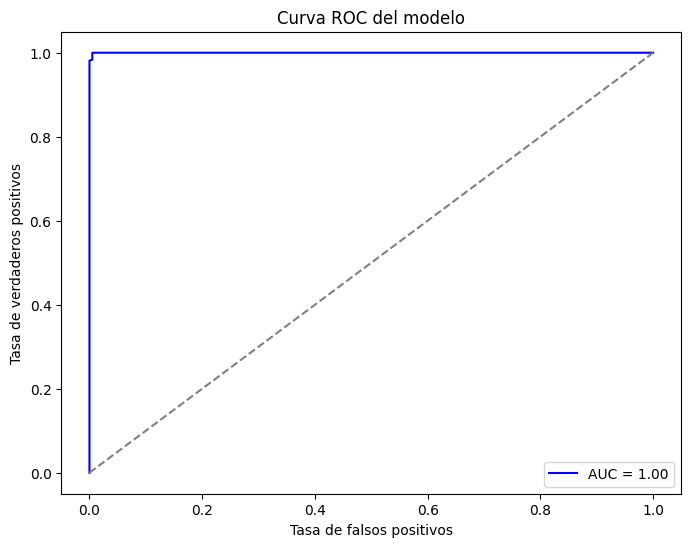

In [26]:
y_pred_train = voting_clf_soft.predict(X_train_norm)

# Métricas de rendimiento
from sklearn.metrics import accuracy_score, classification_report
print(f"Accuracy: {accuracy_score(Y_train, y_pred_train):.4f}")
print(classification_report(Y_train, y_pred_train))


# Obtener probabilidades de predicción del modelo
y_proba = voting_clf_soft.predict_proba(X_train_norm)[:, 1] 

# Calcular la curva ROC
fpr, tpr, _ = roc_curve(Y_train, y_proba)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}", color="blue")
plt.plot([0,1], [0,1], linestyle="--", color="gray")  # Línea de referencia
plt.xlabel("Tasa de falsos positivos")
plt.ylabel("Tasa de verdaderos positivos")
plt.title("Curva ROC del modelo")
plt.legend()
plt.show()

Accuracy: 0.9756
              precision    recall  f1-score   support

         0.0       0.97      0.98      0.98       104
         1.0       0.98      0.97      0.98       101

    accuracy                           0.98       205
   macro avg       0.98      0.98      0.98       205
weighted avg       0.98      0.98      0.98       205



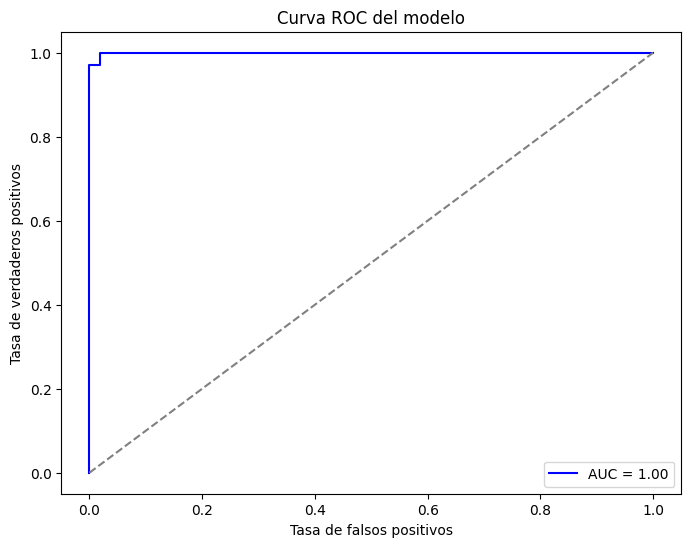

['ensamble_GBC_dataset2.pkl']

In [27]:
from sklearn.ensemble import GradientBoostingClassifier

# Metamodelo (combinador)
metamodelo = GradientBoostingClassifier()

# Crear el StackingClassifier
stacking_clf = StackingClassifier(cv=10, n_jobs=-1, estimators=modelos_base, final_estimator=metamodelo, passthrough=True)

# Entrenar el modelo con los datos seleccionados
stacking_clf.fit(X_train_norm, Y_train)

# Evaluación del modelo en el conjunto de prueba
y_pred = stacking_clf.predict(X_test_norm)

# Métricas de rendimiento
from sklearn.metrics import accuracy_score, classification_report
print(f"Accuracy: {accuracy_score(Y_test, y_pred):.4f}")
print(classification_report(Y_test, y_pred))

# Obtener probabilidades de predicción del modelo
y_proba = stacking_clf.predict_proba(X_test_norm)[:, 1]  # Solo la probabilidad de la clase positiva

# Calcular la curva ROC
fpr, tpr, _ = roc_curve(Y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}", color="blue")
plt.plot([0,1], [0,1], linestyle="--", color="gray")  # Línea de referencia
plt.xlabel("Tasa de falsos positivos")
plt.ylabel("Tasa de verdaderos positivos")
plt.title("Curva ROC del modelo")
plt.legend()
plt.show()

joblib.dump(stacking_clf, 'ensamble_GBC_dataset2.pkl')